

# Axis scales

By default Matplotlib displays data on the axis using a linear scale.
Matplotlib also supports [logarithmic scales](https://en.wikipedia.org/wiki/Logarithmic_scale), and other less common
scales as well. Usually this can be done directly by using the
`~.axes.Axes.set_xscale` or `~.axes.Axes.set_yscale` methods.


Text(0, 0.5, 'log')

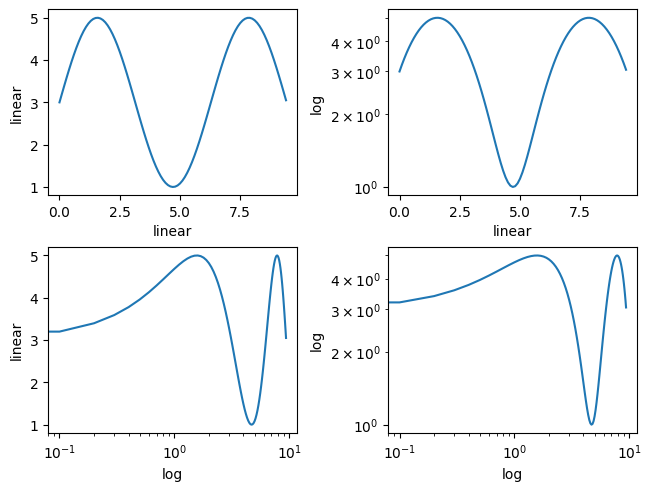

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.scale as mscale
from matplotlib.ticker import FixedLocator, NullFormatter

fig, axs = plt.subplot_mosaic([['linear', 'linear-log'],
                               ['log-linear', 'log-log']], layout='constrained')

x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

ax = axs['linear']
ax.plot(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('linear')

ax = axs['linear-log']
ax.plot(x, y)
ax.set_yscale('log')
ax.set_xlabel('linear')
ax.set_ylabel('log')

ax = axs['log-linear']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_xlabel('log')
ax.set_ylabel('linear')

ax = axs['log-log']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log')
ax.set_ylabel('log')

## loglog and semilogx/y

The logarithmic axis is used so often that there are a set
helper functions, that do the same thing: `~.axes.Axes.semilogy`,
`~.axes.Axes.semilogx`, and `~.axes.Axes.loglog`.



Text(0.5, 1.0, 'loglog(x, y)')

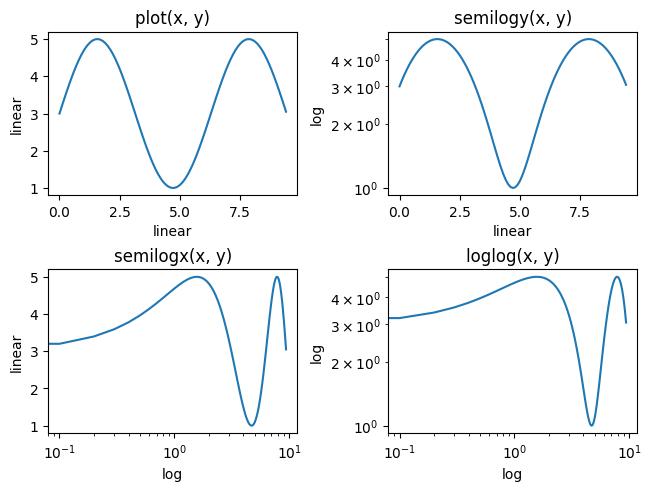

In [2]:
fig, axs = plt.subplot_mosaic([['linear', 'linear-log'],
                               ['log-linear', 'log-log']], layout='constrained')

x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

ax = axs['linear']
ax.plot(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('linear')
ax.set_title('plot(x, y)')

ax = axs['linear-log']
ax.semilogy(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('log')
ax.set_title('semilogy(x, y)')

ax = axs['log-linear']
ax.semilogx(x, y)
ax.set_xlabel('log')
ax.set_ylabel('linear')
ax.set_title('semilogx(x, y)')

ax = axs['log-log']
ax.loglog(x, y)
ax.set_xlabel('log')
ax.set_ylabel('log')
ax.set_title('loglog(x, y)')

## Other built-in scales

There are other scales that can be used.  The list of registered
scales can be returned from `.scale.get_scale_names`:



In [3]:
print(mscale.get_scale_names())

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']


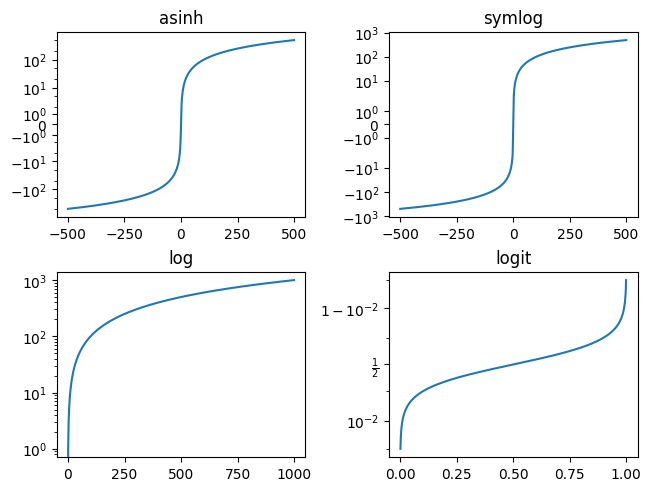

In [4]:
fig, axs = plt.subplot_mosaic([['asinh', 'symlog'],
                               ['log', 'logit']], layout='constrained')

x = np.arange(0, 1000)

for name, ax in axs.items():
    if name in ['asinh', 'symlog']:
        yy = x - np.mean(x)
    elif name in ['logit']:
        yy = (x-np.min(x))
        yy = yy / np.max(np.abs(yy))
    else:
        yy = x

    ax.plot(yy, yy)
    ax.set_yscale(name)
    ax.set_title(name)

## Optional arguments for scales

Some of the default scales have optional arguments.  These are
documented in the API reference for the respective scales at
`~.matplotlib.scale`.  One can change the base of the logarithm
being plotted (eg 2 below) or the linear threshold range
for ``'symlog'``.



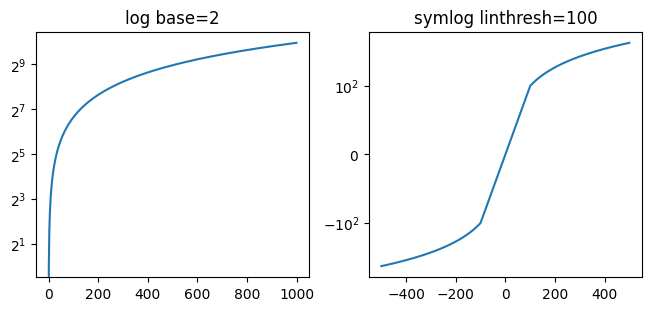

In [5]:
fig, axs = plt.subplot_mosaic([['log', 'symlog']], layout='constrained',
                              figsize=(6.4, 3))

for name, ax in axs.items():
    if name in ['log']:
        ax.plot(x, x)
        ax.set_yscale('log', base=2)
        ax.set_title('log base=2')
    else:
        ax.plot(x - np.mean(x), x - np.mean(x))
        ax.set_yscale('symlog', linthresh=100)
        ax.set_title('symlog linthresh=100')

## Arbitrary function scales

Users can define a full scale class and pass that to `~.axes.Axes.set_xscale`
and `~.axes.Axes.set_yscale` (see `custom_scale`).  A short cut for this
is to use the 'function' scale, and pass as extra arguments a ``forward`` and
an ``inverse`` function.  The following performs a [Mercator transform](https://en.wikipedia.org/wiki/Mercator_projection) to the y-axis.



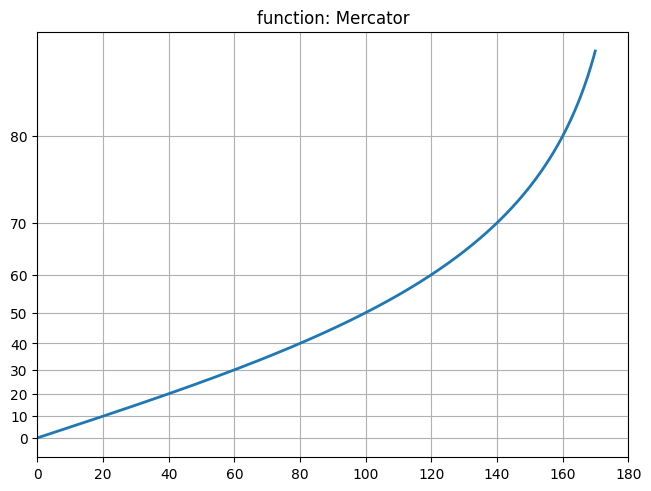

In [6]:
# Function Mercator transform
def forward(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.log(np.abs(np.tan(a) + 1.0 / np.cos(a))))


def inverse(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.arctan(np.sinh(a)))


t = np.arange(0, 170.0, 0.1)
s = t / 2.

fig, ax = plt.subplots(layout='constrained')
ax.plot(t, s, '-', lw=2)

ax.set_yscale('function', functions=(forward, inverse))
ax.set_title('function: Mercator')
ax.grid(True)
ax.set_xlim([0, 180])
ax.yaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 90, 10)))

## What is a "scale"?

A scale is an object that gets attached to an axis.  The class documentation
is at `~matplotlib.scale`. `~.axes.Axes.set_xscale` and `~.axes.Axes.set_yscale`
set the scale on the respective Axis objects.  You can determine the scale
on an axis with `~.axis.Axis.get_scale`:



linear
log


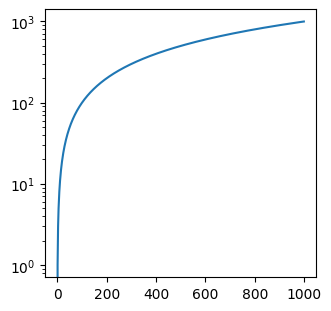

In [7]:
fig, ax = plt.subplots(layout='constrained',
                              figsize=(3.2, 3))
ax.semilogy(x, x)

print(ax.xaxis.get_scale())
print(ax.yaxis.get_scale())

Setting a scale does three things.  First it defines a transform on the axis
that maps between data values to position along the axis.  This transform can
be accessed via ``get_transform``:



In [8]:
print(ax.yaxis.get_transform())

LogTransform(base=10, nonpositive='clip')


Transforms on the axis are a relatively low-level concept, but is one of the
important roles played by ``set_scale``.

Setting the scale also sets default tick locators (`~.ticker`) and tick
formatters appropriate for the scale.   An axis with a 'log' scale has a
`~.ticker.LogLocator` to pick ticks at decade intervals, and a
`~.ticker.LogFormatter` to use scientific notation on the decades.



In [9]:
print('X axis')
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_major_formatter())

print('Y axis')
print(ax.yaxis.get_major_locator())
print(ax.yaxis.get_major_formatter())

X axis
Y axis
